### Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json


In [2]:
pd.read_json('logins.json').to_csv('Logins.csv',index=0)


In [3]:
df=pd.read_csv('Logins.csv',parse_dates=True)
df['login_time']=pd.to_datetime(df['login_time'])

In [4]:
df=df.set_index('login_time')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Empty DataFrame

In [6]:
df['frequency']=1

In [7]:
df_15=df.resample('900s').sum()

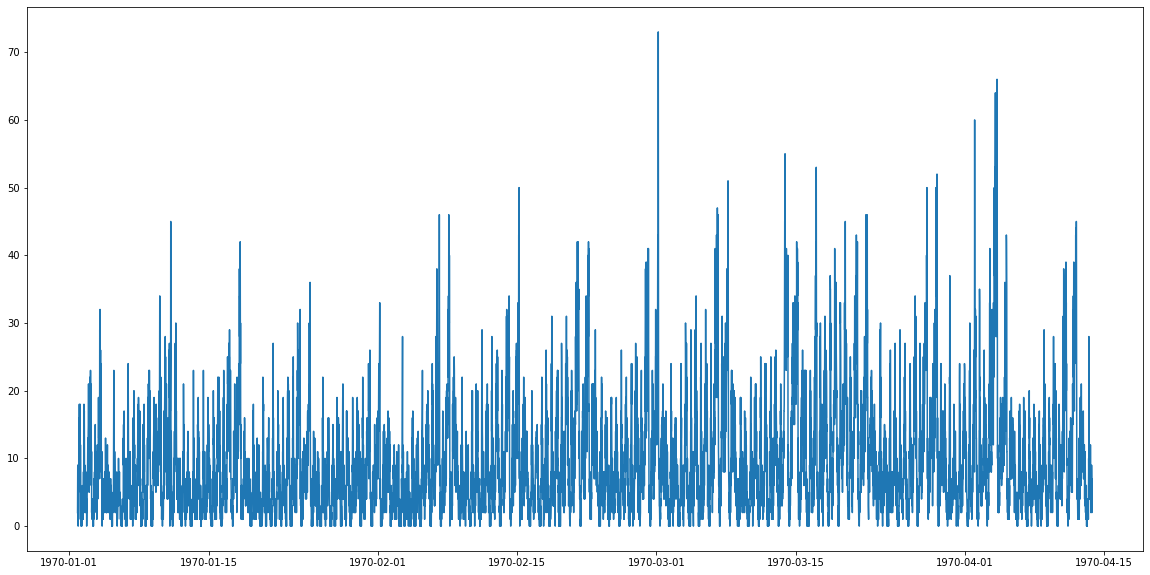

In [8]:
plt.figure(figsize=(20,10))
plt.plot(df_15)
plt.show()

In [9]:

df_15[df_15.frequency==73].index

DatetimeIndex(['1970-03-01 04:30:00'], dtype='datetime64[ns]', name='login_time', freq='900S')

##### Maximum User Logins were recorded on 1 March 1970, Which is  a Sunday

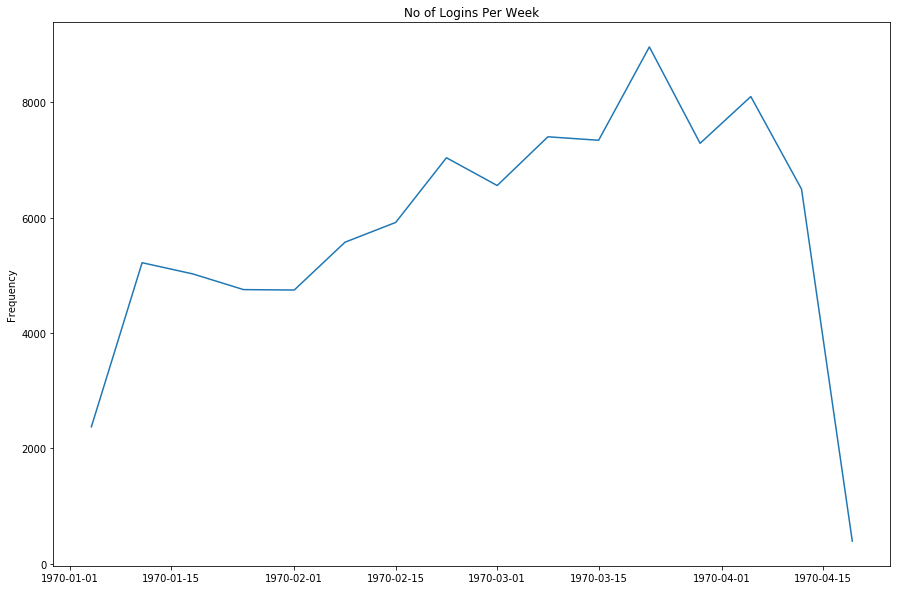

In [10]:

df_W=df.resample('W').sum()
plt.figure(figsize=(15,10))
plt.plot(df_W)
plt.ylabel('Frequency')
plt.title('No of Logins Per Week')
plt.show()

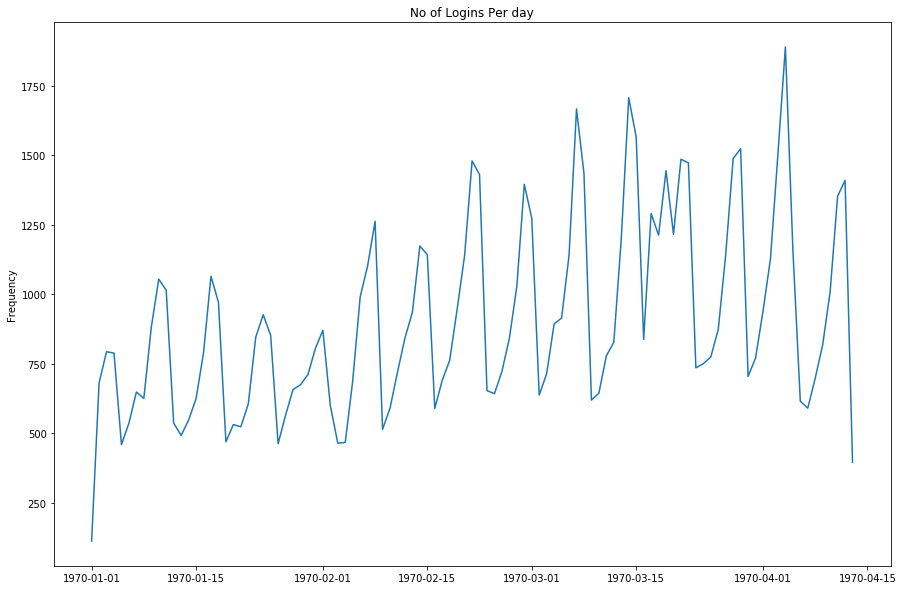

In [11]:
df_D=df.resample('D').sum()
plt.figure(figsize=(15,10))
plt.ylabel('Frequency')
plt.title('No of Logins Per day')
plt.plot(df_D)
plt.show()

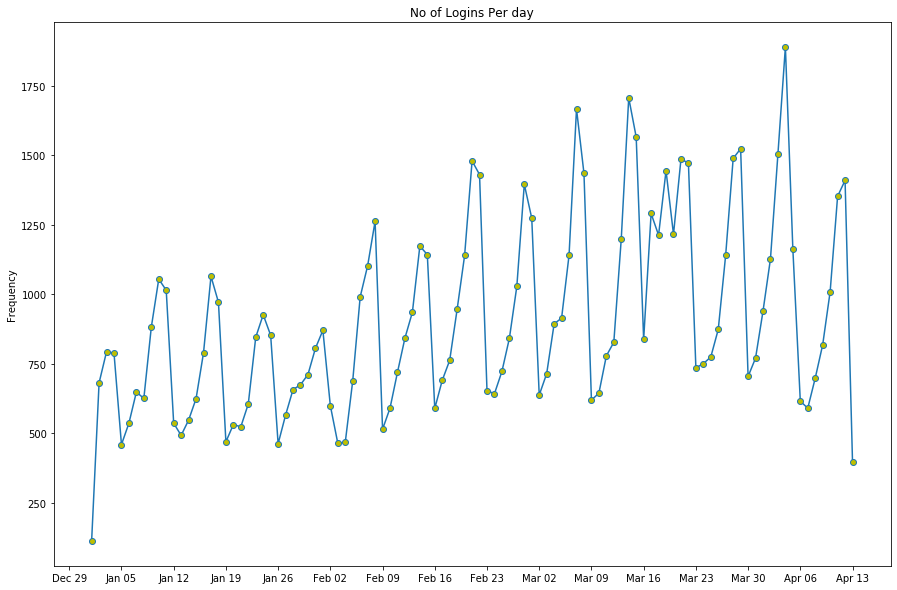

In [14]:
#plt.figure(figsize=(15,10))
import matplotlib.dates as mdates
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
#plt.show()
fig, ax = plt.subplots()

ax.plot(df_D.loc['1970-01':'1970-04', 'frequency'], marker='o', linestyle='-',markerfacecolor='y')
ax.set_ylabel('Frequency')
ax.set_title('No of Logins Per day')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));





##### From the Above Graph,
The  Weekday Monday is Marked on the X-axis, Noticing the same, It shows that users are highly active on Weekends, As the Graph Just constantly every Monday.


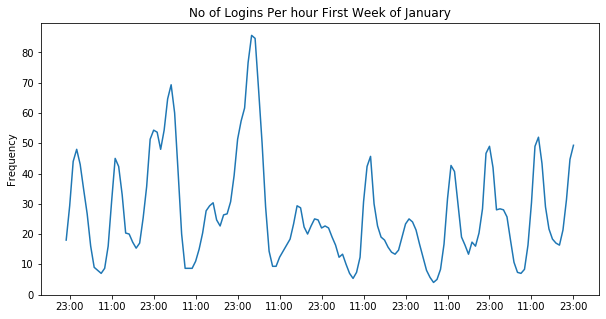

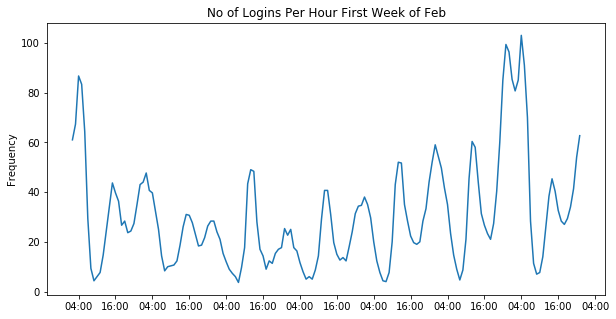

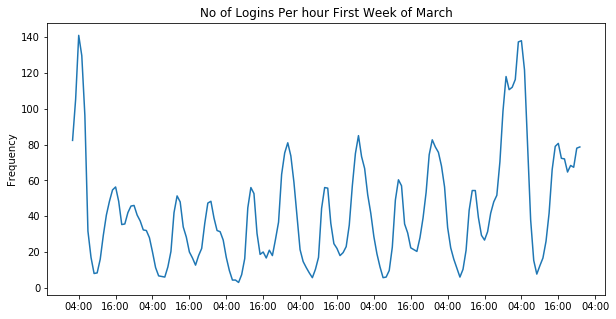

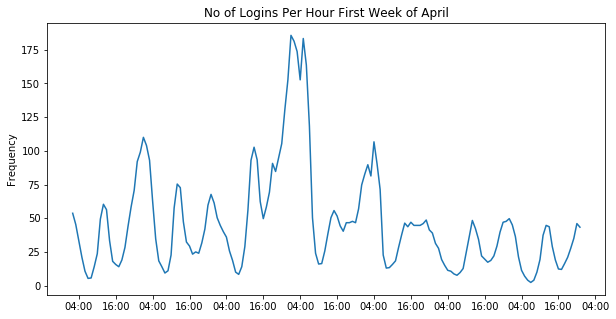

In [13]:
#plt.figure(figsize=(15,10))
df_H=df.resample('H').sum()
import matplotlib.dates as mdates
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
#plt.show()

fig, ax = plt.subplots()
ax.plot(df_H.loc['1970-01-01':'1970-01-07', 'frequency'].rolling(3).mean(), linestyle='-',markerfacecolor='y')
ax.set_ylabel('Frequency')
ax.set_title('No of Logins Per hour First Week of January')
 #Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.HourLocator(interval=12))
 #Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'));

fig, ax = plt.subplots()
ax.plot(df_H.loc['1970-02-01':'1970-02-07', 'frequency'].rolling(3).mean(), linestyle='-',markerfacecolor='y')
ax.set_ylabel('Frequency')
ax.set_title('No of Logins Per Hour First Week of Feb')
 #Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.HourLocator(interval=12))
 #Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'));

fig, ax = plt.subplots()
ax.plot(df_H.loc['1970-03-01':'1970-03-07', 'frequency'].rolling(3).mean(), linestyle='-',markerfacecolor='y')
ax.set_ylabel('Frequency')
ax.set_title('No of Logins Per hour First Week of March')
 #Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.HourLocator(interval=12))
 #Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'));

fig, ax = plt.subplots()
ax.plot(df_H.loc['1970-04-01':'1970-04-07', 'frequency'].rolling(3).mean(), linestyle='-',markerfacecolor='y')
ax.set_ylabel('Frequency')
ax.set_title('No of Logins Per Hour First Week of April')
 #Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.HourLocator(interval=12))
 #Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'));




##### From Each of the graph of first week of respective months, 
We can see that The No of users peak at every Morning and  Every Afternoon 

### Part 2 -Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.


1. We would check have the no of trips between the city increased due to this by checking if the total toll costs  have increased. That gives us an overall idea if our experiment works.

2. We will check for toll costs reimbursed,Actual toll costs, no of trips,date and time for the trips, Then we Conduct Hypothesis tests with Appoproiate Significance level

With two Hypothesis tests

First:
H0:The Total No of Trips and Toll costs incurred and reimbursed increased by some percentage from Gotham to Metropolis
H1:The Total No fo Trips and Tolls costs incurred and reimbursed has remains the same from Gotham to Metropolis

Second:

H0:The Total No of Trips and Toll costs incurred and reimbursed increased by some percentage from Metropolis to Gotham
H1:The Total No fo Trips and Tolls costs incurred and reimbursed has remains the same from Metropolis to Gotham
